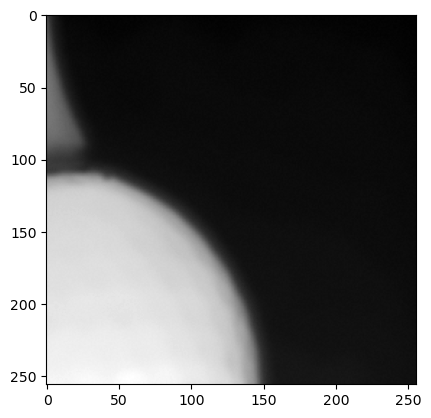

In [46]:
from skimage.io import imread
import matplotlib.pyplot as plt
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
import os
import numpy as np

imdir = r"D:\\images\\from_P_Tadrous\\gbdecon"
psfname = "psf.fits.tif"
imname = "q4.fits.tif"

impath = os.path.join(imdir, imname)

psf = imread(os.path.join(imdir, psfname))

psf = psf.astype(float)

psf = psf/psf.sum()

ims = []
for i in range(1, 5):
    imname = "q" + str(i) + ".r.fits.tif"
    imname = os.path.join(imdir, imname)
    im = imread(imname)
    im = im.astype(float)
    ims.append(im)

plt.imshow(ims[2], cmap='gray')


In [47]:
decons=[]
decons_noncirc=[]

for im in ims:
    decon = richardson_lucy_cp(im, psf, 100)
    decon_noncirc = richardson_lucy_cp(im, psf, 100, noncirc=True)
    decons.append(decon)
    decons_noncirc.append(decon_noncirc)


padding psf

0 10 20 30 40 50 60 70 80 90 

0 10 20 30 40 50 60 70 80 90 
padding psf

0 10 20 30 40 50 60 70 80 90 

0 10 20 30 40 50 60 70 80 90 
padding psf

0 10 20 30 40 50 60 70 80 90 

0 10 20 30 40 50 60 70 80 90 
padding psf

0 10 20 30 40 50 60 70 80 90 

0 10 20 30 40 50 60 70 80 90 


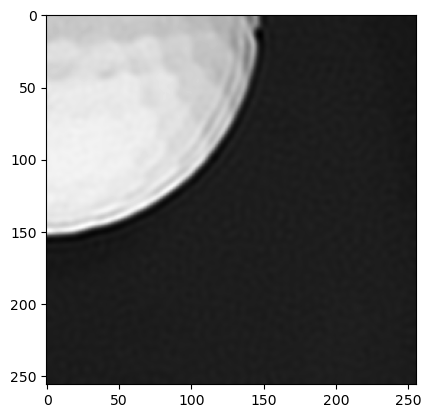

In [48]:

fig=plt.imshow(decon_noncirc, cmap='gray')

In [66]:
def stitch_and_flip(q1, q2, q3, q4):
    stitched = np.zeros((q1.shape[0]*2, q1.shape[1]*2))
    stitched[0:q1.shape[0], 0:q1.shape[1]] = q1
    stitched[q1.shape[0]:q1.shape[0]*2, 0:q1.shape[1]] = q2
    stitched[0:q1.shape[0], q1.shape[1]:q1.shape[1]*2] = q3
    stitched[q1.shape[0]:q1.shape[0]*2, q1.shape[1]:q1.shape[1]*2] = q4

    # flip in vertical direction
    stitched = np.flipud(stitched)
    
    return stitched

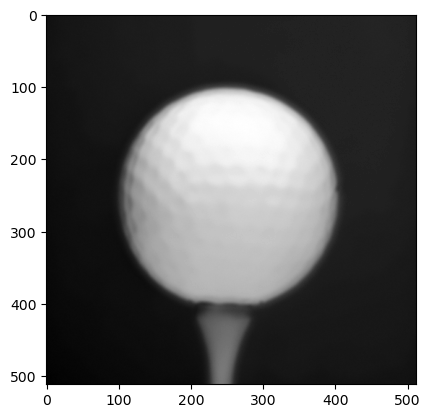

In [67]:
stitched = stitch_and_flip(ims[0], ims[1], ims[2], ims[3])
plt.imshow(stitched, cmap='gray')

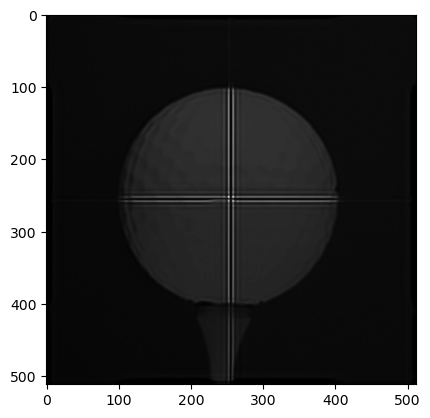

In [70]:
stitched_decon = stitch_and_flip(decons[0], decons[1], decons[2], decons[3])
stitched_decon_noncirc = stitch(decons_noncirc[0], decons_noncirc[1], decons_noncirc[2], decons_noncirc[3])

plt.imshow(stitched_decon, cmap='gray')

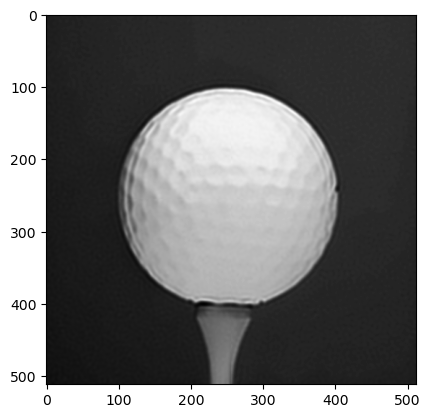

In [71]:
stitched_decon_noncirc = stitch_and_flip(decons_noncirc[0], decons_noncirc[1], decons_noncirc[2], decons_noncirc[3])
plt.imshow(stitched_decon_noncirc, cmap='gray')
